In [1]:
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
import pandas as pd
import seaborn as sns

from utils.statistics import check_normality, check_homoscedasticity, check_group_difference

## Prophet

### Hyperparameters

In [2]:
df = pd.read_csv("../results/tuning/prophet.csv", sep=";")
metric = "F1-Score"

#### Seasonality

In [3]:
for seasonality in ["DailySeasonality", "WeeklySeasonality", "YearlySeasonality"]:
    print(f"Normality condition for {seasonality}:", check_normality(df[df[seasonality]!="auto"][metric]))
    assert check_homoscedasticity(df[df[seasonality]=="true"][metric], df[df[seasonality]=="false"][metric])
    print(f"Significant group difference for {seasonality}:", check_group_difference(df[df[seasonality]=="true"][metric], df[df[seasonality]=="false"][metric]))

Normality condition for DailySeasonality: True
Significant group difference for DailySeasonality: False
Normality condition for WeeklySeasonality: False
Significant group difference for WeeklySeasonality: True
Normality condition for YearlySeasonality: True
Significant group difference for YearlySeasonality: False


/home/dom/Projects/trading-ml/.venv/lib/python3.11/site-packages/scipy/stats/_stats_py.py:1806: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=14
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "


DailySeasonality
auto     46
false    49
true     49
Name: F1-Score, dtype: int64


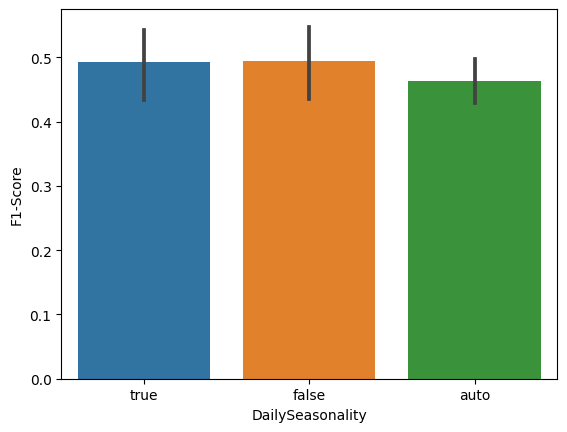

In [4]:
print(round(df.groupby("DailySeasonality")[metric].mean()*100).astype(int))
sns.barplot(x="DailySeasonality", y=metric, data=df);

WeeklySeasonality
auto     48
false    36
true     54
Name: F1-Score, dtype: int64


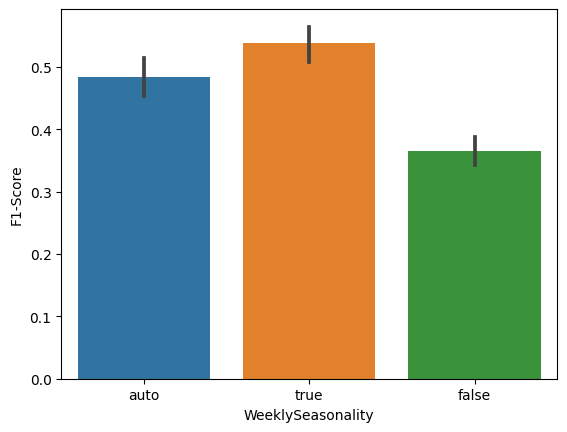

In [5]:
print(round(df.groupby("WeeklySeasonality")[metric].mean()*100).astype(int))
sns.barplot(x="WeeklySeasonality", y=metric, data=df);

YearlySeasonality
auto     47
false    52
true     44
Name: F1-Score, dtype: int64


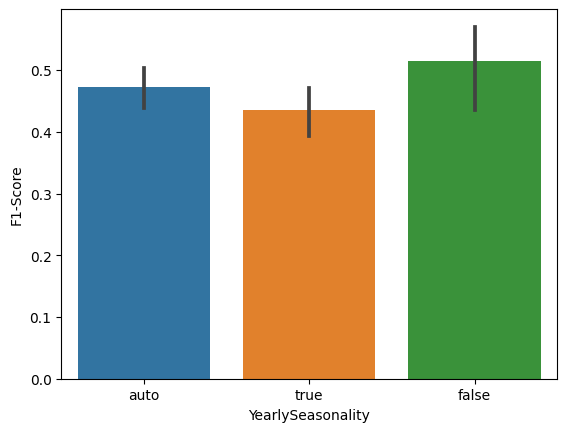

In [6]:
print(round(df.groupby("YearlySeasonality")[metric].mean()*100).astype(int))
sns.barplot(x="YearlySeasonality", y=metric, data=df);

#### Look Back Window Size

Significant group difference: True
LookBackWindowSize
10      36
20      48
65      47
260     52
520     52
780     47
1300    48
Name: F1-Score, dtype: int64


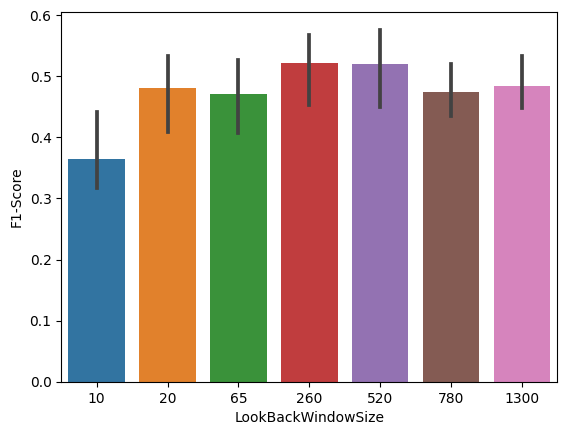

In [7]:
print(f"Significant group difference:", check_group_difference(*[df[df["LookBackWindowSize"]==lbws][metric] for lbws in df["LookBackWindowSize"].unique()]))
print(round(df.groupby("LookBackWindowSize")[metric].mean()*100).astype(int))
sns.barplot(x="LookBackWindowSize", y=metric, data=df);

#### Specific Comparison
For the following results, 'n_validations' was doubled, 'weekly_seasonality' set to True, and 'yearly_seasonality' set to False.

LookBackWindowSize
260    56
520    57
Name: F1-Score, dtype: int64
DailySeasonality
False    56
True     56
Name: F1-Score, dtype: int64


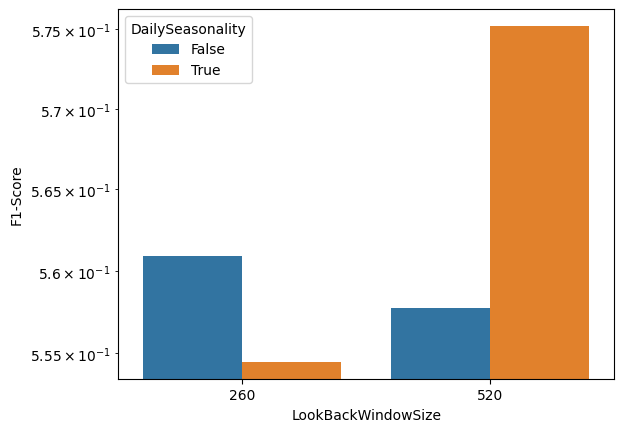

In [8]:
df2 = pd.read_csv("../results/tuning/prophet_specific.csv", sep=";")
print(round(df2.groupby("LookBackWindowSize")[metric].mean()*100).astype(int))
print(round(df2.groupby("DailySeasonality")[metric].mean()*100).astype(int))
sns.barplot(x="LookBackWindowSize", y=metric, hue="DailySeasonality", data=df2).set(yscale='log');

### Conclusion
- Set 'daily_seasonality' and 'weekly_seasonality' to True, but 'yearly_seasonality' to False.
- Set 'look_back_window_size' to 520 (two years).